# Finanças Quantitativas

Lucas Emanuel Resck Domingues

## Lista 1

**Referência**: Carmona, René. Statistical analysis of financial data in R, 2013.

### Problema 1.1

1. Temos que $F_1(x) \le F_2(x)$, para cada $x$. Então, à medida que $x$ se aproxima de $-\infty$, $F_2$ garante uma área maior para a cauda esquerda. Como vale para todo $x$, conclui-se que a cauda esquerda de $F_2$ é mais pesada.

2. Ora, veja que $1 - F_1(x) \ge 1 - F_2(x)$. Portanto, à medida que $x$ se aproxima de $+\infty$,  $F_1(x)$ garante maior área para a cauda direita. Conclui-se, pelo mesmo raciocínio, que $F_1$ tem a cauda direita mais pesada.

3. Sabemos que $F_1(x) \le F_2(x)$ para todo $x$. Se buscarmos $y$ tal que $F_2(y) = F_1(x)$, teremos que $y \le x$, afinal $F_2$ é monótona crescente. Concluímos que os quantis de $F_2$ são menores do que ou iguais aos de $F_1$: $$\pi^p(F_2) \le \pi^p(F_1)$$
Como $-VaR$ é um quantil da distribuição do retorno, $F_1$ tem maior $-VaR$ e menor $+VaR$. Ou seja, $F_2$ entrega maior *Value at Risk*.

Para se guiar, observe um exemplo de $F_1$ e $F_2$ no gráfico abaixo.

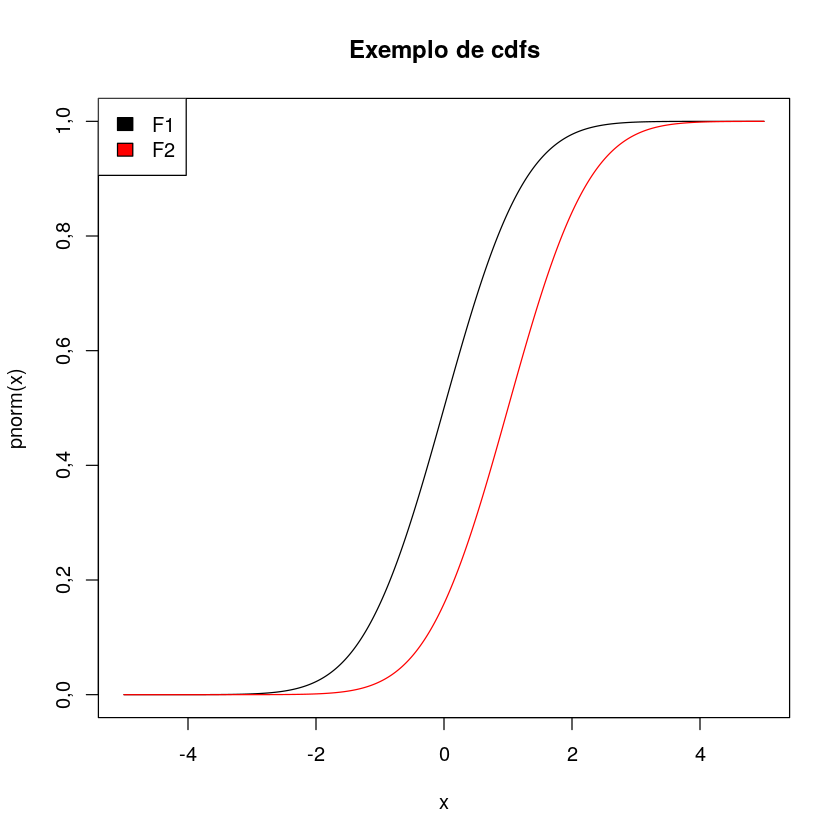

In [5]:
x = seq(-5, 5, 0.01)
plot(x, pnorm(x), type="l", main="Exemplo de cdfs", col=1)
lines(x, pnorm(x, 1), col=2)
legend("topleft", c("F1", "F2"), fill=c(1, 2))

### Problema 1.2

In [98]:
# 1
X = rexp(1024, 0.2)

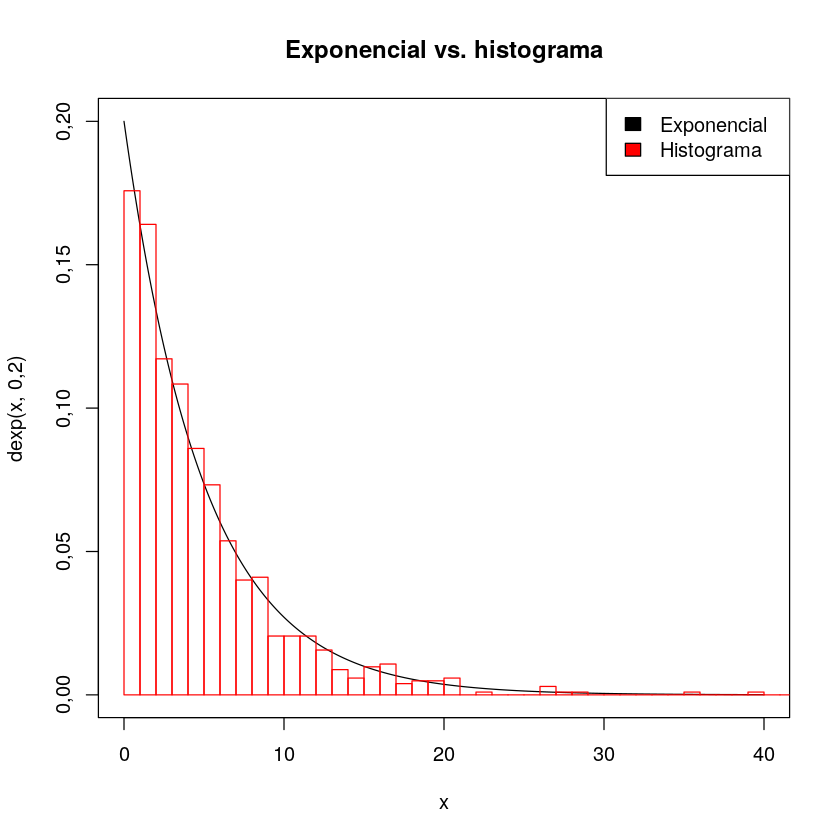

In [137]:
# 2
x = seq(0, 40, 0.1)
plot(x, dexp(x, 0.2), type="l", col=1, main='Exponencial vs. histograma')
hist = hist(X, plot=F, breaks=40)
hist$counts = hist$counts / sum(hist$counts)
#lines(hist$breaks[1:length(hist$breaks)-1], hist$counts/sum(hist$counts), col=2)
plot(hist, add=T, border=2)
legend("topright", c("Exponencial", "Histograma"), fill=c(1, 2))

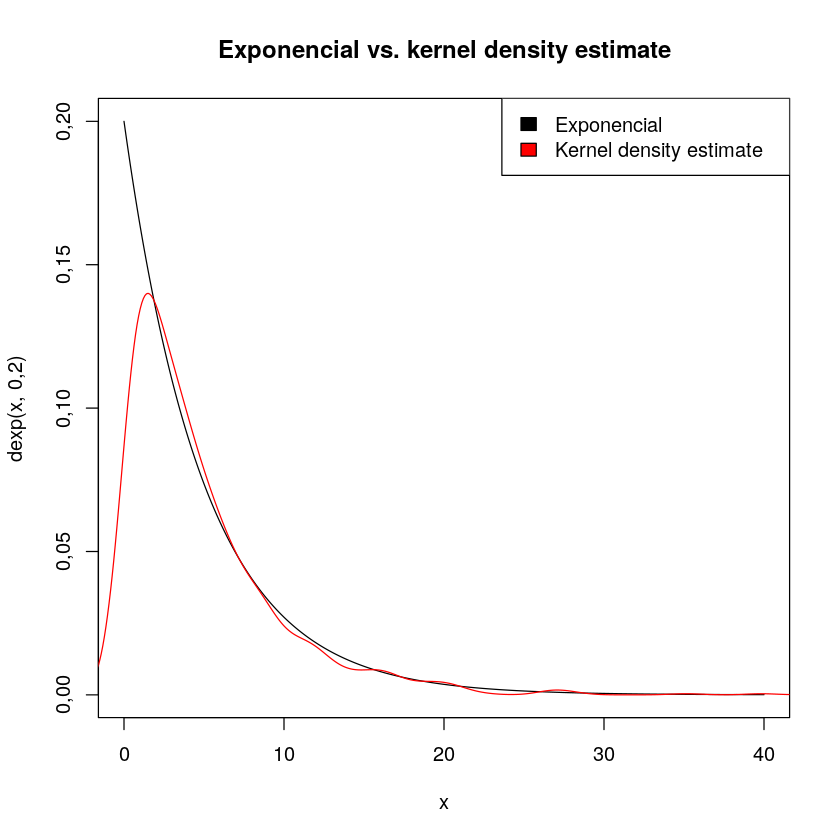

In [115]:
# 3
x = seq(0, 40, 0.1)
plot(x, dexp(x, 0.2), type="l", col=1, main='Exponencial vs. kernel density estimate')
# hist = hist(X, plot=F, breaks=50)
# lines(hist$breaks[1:length(hist$breaks)-1], hist$counts/sum(hist$counts), col=2)
# legend("topright", c("Exponencial", "Histograma"), fill=c(1, 2))
lines(density(X, 1), col=2)
legend("topright", c("Exponencial", "Kernel density estimate"), fill=c(1, 2))

4. - No plot com o histograma, podemos ver que a função que gera a curva não é derivável, diferentemente do plot com o *kernel density estimate* (utilizando um kernel gaussiano);
   - Como não há amostras com valor menor do que zero e a função kernel do *kde* é uma gaussiana, sua curva acaba por subir de valores próximos ao zero, enquanto a curva original já se inicia em 0,20. Ou seja, para valores de x muito próximos de zero, temos estimativas muito ruins.

    Considerando que o histograma também é um *kernel density estimator* (com uma função bem específica), me parece mais razoável a função gaussiana como kernel.